In [1]:
import tensorflow as tf

In [2]:
tf.__version__  # This uses Double Underscore

'2.2.0'

In [4]:
hello = tf.constant('Hello World')  # To create a simple constant with Tensorflow, which TF stores as a tensor object

In [5]:
type(hello)

tensorflow.python.framework.ops.EagerTensor

In [6]:
x = tf.constant(100)

In [7]:
type(x)

tensorflow.python.framework.ops.EagerTensor

MNSIT = A group of images

The MNIST database of handwritten digits. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

In [16]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 112s 10us/step


In [28]:
X_train.shape  # 60000 different images of different digits with 20*20 pixels

(60000, 28, 28)

# Color component

Red, Green, Blue (RGB)

0-255, 0-255, 0-255

color components are varying between 0 to 255

In [31]:
X_train[1]  #20*20 pixels i.e. total 784 elements

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [37]:
y_train[900]   # y_train denotes digit contain

9

In [38]:
y_train.max()

9

In [39]:
y_train.min()

0

In [41]:
y_train.shape

(60000,)

In [21]:
#X_train[99]

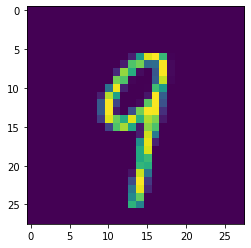

In [32]:
sample = X_train[900]
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(sample)   # To display image

In [42]:
y_train[100]

5

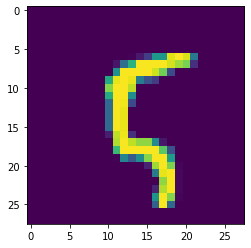

In [26]:
sample = X_train[100]
plt.imshow(sample)

In [44]:
X_train, X_test = X_train / 255.0, X_test / 255.0  # Division by 255.0 means it converts into 0 or 1 i.e. white or black

In [46]:
model = tf.keras.models.Sequential([
    
    # Input Layer
    tf.keras.layers.Flatten(input_shape=(28, 28)), #Flattern= TO convert two dimensional array into single dimension 
                                       ##i.e. 28*28 Pixels (2D) into 784 Pixels (1D)
   
    # 1st hidden layer
    tf.keras.layers.Dense(128, activation = 'relu'), # Dense-Fully Connected ANN # Input of 1 perceptron connected to all hidden layers 
                                                     ## 'relu' = Rectifier Linear unit Activation Function
                                                     ### 128 Number of perceptron
                                                     #### Passing 784 pixels through 128 perceptrons i.e. 784/128 = 6 to 7 perceptron
    # 2nd hidden layer
    tf.keras.layers.Dense(128, activation = 'relu'), # 128 Number of perceptron
    tf.keras.layers.Dropout(0.2),
    
    # 3rd hidden layer
    tf.keras.layers.Dense(128, activation = 'relu'), # 128 Number of perceptron
    tf.keras.layers.Dropout(0.2),
    
    # Output layer
    tf.keras.layers.Dense(10, activation = 'softmax') # 'softmax' for multiclass classification
                                                      ## 10 Number of perceptron, i.e. it should be equal to class [10] or one less than class [9] 
                                                      ### Here class is 0 to 9 (Digits)
                                                      #### In case of binary classification 1 peceptron that will give 'Yes' or 'No'

])

model.compile(optimizer = 'adam', # Otimize the process of Gradient Decent, the way to reach global minima
                                  ## Different optimisers-rmsprop, adagard
             
             loss = 'sparse_categorical_crossentropy', # TO calculate diffaerence between predicted value and actual value.
                                                       ## For Binary class problem use binary_crossentropy
              
             metrics = ['accuracy'])  ## Also we can use precision, recall, r2_score, MSE, RMSE

In [47]:
model.fit(X_train, y_train, epochs = 5)   # epochs- How many times need to pass the data i.e. 60k images will pass five times
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7941 - accuracy: 0.7353
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3638 - accuracy: 0.8926
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2745 - accuracy: 0.9172
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2187 - accuracy: 0.9350
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1819 - accuracy: 0.9449
313/313 - 1s - loss: 0.1493 - accuracy: 0.9549


[0.1493469476699829, 0.9549000263214111]

In [48]:
model.fit(X_train, y_train, epochs = 10)   # epochs- How many times need to pass the data i.e. 60k images will pass five times
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1549 - accuracy: 0.9537
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1368 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1226 - accuracy: 0.9631
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1086 - accuracy: 0.9679
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1014 - accuracy: 0.9700
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0893 - accuracy: 0.9730
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0843 - accuracy: 0.9748
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0790 - accuracy: 0.9760
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0729 - accuracy: 0.9781
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.068

[0.09553270787000656, 0.9718999862670898]